<a href="https://colab.research.google.com/github/ushasis02/Course/blob/master/Working_with_OpenAI_APIs_Comprehension_Qs_Starter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains the starter codes for the comprehension-type questions for the sesion '**Working with OpenAI APIs**'.

<br>


**INSTRUCTIONS:**
1. DO NOT modify the cells below the text highlighted in <font color='RED'>RED TEXT</font> or titled 'DO NOT MODIFY'. These are the essential for running the subsequent cells and completing your codes. <br>

2. You will need to run these cells in the order present in the notebook to execute your code successfully.

3. You need to update the code in the cell below the text marked by <font color='green'>GREEN TEXT</font>

4. Make sure you upload the text file containing the API key in the following text file <b>OPENAI_API_Key.txt</b>


Click on the Run button as shown in the image to run the code cells marked with DO NOT MODIFY

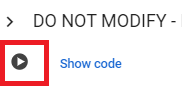

# <font color='RED' >IMPORT THE LIBRARIES</font>
---





In [2]:
# @title Run this cell to install OpenAI library and import OpenAI API Key (NOTE: Make sure the text file containing OpenAI Key is uploaded)
# Install the OpenAI Library
print('Installing OpenAI Library')
!pip install -U -qq openai
# import openai and set the API key
import openai
import os
print('Reading OpenAI Key Text File')

from google.colab import drive
drive.mount('/content/drive')

# Remember to upload the file containing your OpenAI key. Make sure the file name is correct
with open("/content/drive/MyDrive/GenAI_Course_Master/Course_1_ShopAssistAI/Week_2/Session_1/OPENAI_API_Key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())


# # Alternatively you may also read the API key via Google Colab secrets
# from google.colab import userdata
# openai.api_key = userdata.get('OpenAI_API_Key')

if openai.api_key.startswith('sk-'):
    print('API key loaded successfully')
else:
  print('Improper API key format')

Installing OpenAI Library
Reading OpenAI Key Text File
Mounted at /content/drive
API key loaded successfully


# <font color='RED' >MCQ 1
**NOTE:** Do not modify</font>
<br>

Based on the product description given in the `laptop_data` dataset, classify the laptop into one of the following categories using the following tags:
- general
- business
- gamer
- programmer
- multimedia

In [3]:
# @title DO NOT MODIFY - Import the necessary libraries & dataset for MCQ 1 and display the DataFrame
# import the necessary libraries
import pandas as pd
import numpy as np
# Read the Laptop Dataset
df = pd.read_csv('https://cdn.upgrad.com/uploads/production/5a1512d8-a326-4b21-8a1c-40b0a2e0082e/laptop_descriptions.csv')
df.head(12)

,laptop_description
0,The Dell Inspiron is a versatile laptop that c...
1,The MSI GL65 is a high-performance laptop desi...
2,The HP EliteBook is a premium laptop designed ...
3,The Lenovo IdeaPad is a versatile laptop that ...
4,The ASUS ZenBook Pro is a high-end laptop that...
5,The Acer Predator is a powerhouse laptop desig...
6,The Microsoft Surface Laptop is a premium devi...
7,The Lenovo ThinkPad is a powerful laptop desig...
8,The HP Pavilion is a budget-friendly laptop th...
9,The ASUS ROG Strix G is a high-performance gam...


The laptop tags and their descriptions are given in the table below:


| Category | Description |
| --------------- | --------------- |
| general | For general purpose use such as light web browsing, editing documents etc. |
| business | For business users, the focus is on portability, battery backup and general purpose use. |
| gamer | For gamers, the focus is primarily on high-performance, a separate GPU for high-performance graphics, a high-end CPU processor etc. |
| programmer | For programmers, the focus is on performance, battery backup, high-end RAM etc. |
| multimedia | For multimedia use cases, the requirements are a good quality/ high resolution display, wide screens, good audio and video quality, battery backup, efficiency etc. |


The final output dataframe should like the table below:

| laptop_description | category |
|--------------- |--------------- |
| The Dell Inspiron ... | **general** |
| The MSI GL65 ... | **gaming** |
|  ... | **...** |


# <font color='green' >CODE FOR MCQ 1</font>
 ---


In [15]:
# @title TO DO 1.1 - OpenAI Chat Completion Response

### Function to get OpenAI's response - ChatCompletion Model
def get_chat_response_mcq1(user_request):
  '''
  This function ONLY takes `user_request` as the input argument.
  As you can see, the System Prompt is given inside the function itself so we don't require to give it as an input argument
  '''
  MODEL = "gpt-3.5-turbo" # Define GPT model

  SYSTEM_MESSAGE = '''You are a shopping assistant. The user will give you laptop description and some categories and their details. You have to find out which of the categories does the laptop fit best according to description. Remember to only give one word output, the category name, from the list of categories only, which resembles most closely.''' # Default System Message

  try:

    messages = [
        {"role": "system", "content": SYSTEM_MESSAGE},
        {"role": "user", "content": user_request}
    ] # Define the list of messages

    response = openai.chat.completions.create(model= MODEL, messages=messages)  # Get the ChatCompletion Response from the GPT-3.5 model

    response_content = response.choices[0].message.content # Parse the response_content from the message

    return response_content

  # Raise exception error
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [9]:
# @title TO DO 1.2 - PROMPT DEFINITION

mcq1_prompt = '''
From the description of a laptop (delimited by '###'), you have to identify what role does the laptop serve. Refer to the key value pairs of categories and category details below. Identify which of the following details does the product description fits best and assign that category to that latpop. \n
Categories:
[
    'general': 'For general purpose use such as light web browsing, editing documents etc.'
    'business': 'For business users, the focus is on portability, battery backup and general purpose use.'
    'gamer': 'For gamers, the focus is primarily on high-performance, high-end graphics requirement, efficient processor etc.'
    'programmer': 'For programmers, the focus is on performance, battery backup, high-end RAM etc.'
    'multimedia': 'For multimedia use cases, the requirements are a good quality/ high resolution display, wide screens, good audio and video quality, battery backup, efficiency etc.' # Write the prompt here
] \n
Laptop description: {description}
'''# Write the user prompt here



In [16]:
# @title TO DO 1.3 - Code to tag the laptop based on their descriptions
def tag_laptop():

  laptop_df = df.copy()
  laptop_dict = laptop_df.to_dict(orient ='records')

  # Get the laptop_category for each laptop_decription df['laptop_description'] by iterating over the dataframe with a for-loop

  for i in range(len(laptop_dict)):
    prompt = mcq1_prompt.format(description=laptop_dict[i]['laptop_description'])
    laptop_category = get_chat_response_mcq1(prompt)
    # Assign the laptop category to the column laptop_category
    laptop_df.at[i,'Category'] = laptop_category

  # return the DataFrame
  return laptop_df
  # How will you get the description for each laptop?

  #code....

  # Next step? How will your model get the category for that product?

  # Assign the laptop category in the 'category' column...



In [17]:
# Try to find the category of the 2nd laptop in the dataframe.
tag_df = tag_laptop()
# Try to find the total number of laptops belonging to each category.
tag_df.iloc[1]['Category']

'gamer'

In [18]:
tag_df['Category'].value_counts()

,count
Category,
multimedia,6
gamer,5
business,5
general,2
'business',1
programmer,1


# <font color='RED' >MCQ 2
**NOTE:** Do not modify</font>
<br>
**Task**: Information Extraction

Extract the relevant values for the following dictionary items from the product description.


```
{
    "Brand": ___ ,
    "Model Name": ___ ,
    "GPU processor": ___ ,
    "Display Resolution": ___ ,
    "Weight": ___ ,
    "Processor": ___ ,
    "Clock speed": ___ ,
    "Budget": ___
```

You can add this property dictionary for all the products to a list and output that list.

# <font color='GREEN' >CODE FOR MCQ 2</font>
 ---

In [19]:
# @title TO DO 2.1 - CREATE THE PROMPT
# NOTE: The mcq2_prompt must also send the description as context from each df['Description'] value of the laptops
structure = '''{
    "Brand": ___ ,
    "Model Name": ___ ,
    "GPU processor": ___ ,
    "Display Resolution": ___ ,
    "Weight": ___ ,
    "Processor": ___ ,
    "Clock speed": ___ ,
    "Budget": ___
}'''

mcq2_prompt = '''
Laptop Decription: {description}
From the laptop decription above, you have to extract relevant values for the following dictionary items. The dictionary structure should be as follows: {str}
Try giving quantitative, absolute, or numerical outputs. Try not to give qualitative or adjective outputs. for example: If the processing speed of a laptop is 2.4GHz, then, in the "processing speed" key, give output as '2.4GHz' instead of 'very fast'.
Extract only one word values of these properties. Fill in the blanks for each product and output each product's dictionary in json format.
'''



In [20]:
# @title TO DO 2.2 - Define the Chat Completion Response
# Function to get OpenAI's response - ChatCompletion Model
def get_chat_response_mcq2(user_request):

  MODEL = 'gpt-3.5-turbo' # Define GPT model

  SYSTEM_MESSAGE = 'You are a helpful shopping assistant.'# Default System Message

  try:

    messages = [
        {'role': 'system', 'content': SYSTEM_MESSAGE},
        {'role': 'user', 'content': user_request}] # Define the list of messages

    response = openai.chat.completions.create(model= MODEL,
        messages = messages,
        response_format = {'type': 'json_object'})
        # Get the ChatCompletion Response from the GPT-3.5 model

    response_content = response.choices[0].message.content # Parse the response_content from the message

    return response_content

  # Raise exception error
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [21]:
# @title TO DO 2.3 - Write the code to extract product information from the 'laptop_description' column values in the DataFrame
def extract_information():

# You have to store the property dictionaries in a list.
  laptop_df = df.copy()
  laptop_dict = laptop_df.to_dict(orient ='records')
  result = []
  for i in range(len(laptop_dict)):
    prompt = mcq2_prompt.format(description=laptop_dict[i]['laptop_description'], str=structure)
    values = get_chat_response_mcq2(prompt)
    result.append(values)
    # We will print each of the dictionary of properties
    print(result[i])
  # But in the function output, we are returning the whole list as a whole.
  return result
  # Your solution can differ, but your end goal is to output the properties for all products in one single list.
# How will you attempt the task?
# First, get relevant values for each property using the model.
# Think about how to add all those values to a list.

In [22]:
values = extract_information()

{
    "Brand": "Dell",
    "Model Name": "Inspiron",
    "GPU processor": "Intel",
    "Display Resolution": "1920x1080",
    "Weight": "2.5kg",
    "Processor": "Core i5",
    "Clock speed": "2.4GHz",
    "Budget": "35000"
}
{
    "Brand": "MSI",
    "Model Name": "GL65",
    "GPU processor": "NVIDIA",
    "Display Resolution": "1920x1080",
    "Weight": "2.3kg",
    "Processor": "Intel",
    "Clock speed": "2.6GHz",
    "Budget": 55000
}
{
    "Brand": "HP",
    "Model Name": "EliteBook",
    "GPU processor": "Intel UHD",
    "Display Resolution": "1920x1080",
    "Weight": "1.5kg",
    "Processor": "Core i7",
    "Clock speed": "2.8GHz",
    "Budget": "90000"
}
{
    "Brand": "Lenovo",
    "Model Name": "IdeaPad",
    "GPU processor": "Intel UHD",
    "Display Resolution": "1366x768",
    "Weight": "2.2kg",
    "Processor": "Intel Core i3",
    "Clock speed": "2.1GHz",
    "Budget": "25,000"
}
{
    "Brand": "ASUS",
    "Model Name": "ZenBook Pro",
    "GPU processor": "NVIDIA",
   

If you are feeling confident, you can try to attempt another task: Find the best laptop for a particular task.
<br>
The user can, for example, ask for a laptop which is best for gaming, and the model can refer to the list we generated above to give the best laptop for gaming.
<br>
However, a hard task will be to make the model strictly follow the given list. Many times the model can answer from its pre training dataset.

In [24]:
# We suggest converting the list to a string first to avoid the extra step of iterating over the list to input in the prompt
# We have to convert the list to a string for convenience in the next part
string = ''
for i in range(len(values)):
  string = string + values[i] + "\n"

# Giving the property values as input to system

SYSTEM_PROMPT = '''{props} \n This is a list of laptops and their properties. Strictly adhere to the given list only and output the product name only if found in the list.
\n The user will ask for the best suited laptop for a task, your job is to find out a laptop which is the best fit for the task. Use these to undestand which laptops can work with the required task:
Categories:
[
    'general': 'For general purpose use such as light web browsing, editing documents etc.'
    'business': 'For business users, the focus is on portability, battery backup and general purpose use.'
    'gamer': 'For gamers, the focus is primarily on high-performance, high-end graphics requirement, efficient processor etc.'
    'programmer': 'For programmers, the focus is on performance, battery backup, high-end RAM etc.'
    'multimedia': 'For multimedia use cases, the requirements are a good quality/ high resolution display, wide screens, good audio and video quality, battery backup, efficiency etc.' # Write the prompt here
] \n
 If you do not find any relevant information in the laptop list, please answer "not found".
'''.format(props = 'string')

user_request = 'From the list of laptops in your system prompt, which is the best laptop for watching movies?'

def get_chat_response(sys_msg, user_request):

  MODEL = 'gpt-3.5-turbo-1106'# Define GPT model


  try:
  # Define the list of messages
    messages = [
        {'role': 'system', 'content': sys_msg},
        {'role': 'user', 'content': user_request}
    ]

# Get the ChatCompletion Response from the GPT-3.5 model
    response = openai.chat.completions.create(
        model = MODEL,
        messages = messages
    )

    response_content = response.choices[0].message.content
    # Parse the response_content from the message

    return response_content

  # Raise exception error
  except Exception as e:
    print(f"An error occurred: {e}")
    return None


In [23]:
len(values)

20

In [25]:
print(get_chat_response(SYSTEM_PROMPT, user_request))

- Lenovo Legion 7i: multimedia


# <font color='RED' >MCQ 3
**NOTE:** Do not modify</font>
<br>

Build a Question & Answering (Q&A) system by using wikipedia for extracting the relevant context and relaying the information to the user.

The sequencd of steps is detailed below with the expected output from each function being called:

1. The user inputs the query "How tall is the Eiffel Tower?"

2. The first LLM function will identify the subject of the user's query and extract the relevant search term for querying through Wikipedia. In this case, the subject of the user's query is 'Eiffel Tower'.

3. The  function `wiki_search` (that has already been defined) will search wikipedia for the provided `query_term` and return the wikipedia article.
In this case the function will search wikipedia for the term 'Eiffel Tower' and return the wikipedia content on `Eiffel Tower`

4. The third function will pass the wikipedia content along with the user's original query to return the answer to the query.

In this case, the third function `user_answer` uses the Wikipedia content and the original user query to return the following output: Eiffel Tower is 300 meters tall.

**NOTE**: Make sure to give only the Wikipedia content as context to the model in the third function `user_answer`.
(Hint - You can give the content to user by attaching it to the user_request input to the function)

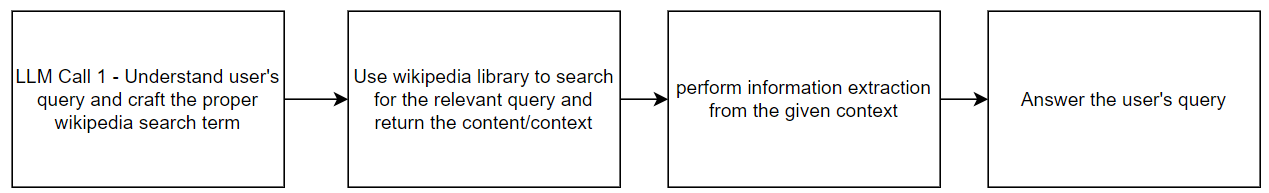

In [26]:
!pip install -q -U wikipedia-api
import wikipediaapi

  Preparing metadata (setup.py) ... done


In [ ]:
######## DO NOT MODIFY ########
# @title DO NOT MODIFY - Install the Wikipedia Library
# Install wikipedia library
!pip install -qq -U wikipedia-api
import wikipediaapi

In [28]:
######## DO NOT MODIFY ########
# @title DO NOT MODIFY - Wikipedia Search Function
# Function to search Wikipedia for the user's search query and then return the content

# Importing necessary libraries

import wikipediaapi

# Define a function named wiki_search that takes a query term as input, you will be needing this function later on.
def wiki_search(query_term):
    """
    Search Wikipedia for the user's search query and return the content.

    Args:
    - query_term (str): The search term or query to look up on Wikipedia.

    Returns:
    - str: The content retrieved from the Wikipedia page corresponding to the query term.
    """

    # Set the Wikipedia user-agent header
    string = "SearchQuery/1.0 (upGrad;)"

    # Create a Wikipedia API object with the specified user agent and language
    wiki_wiki = wikipediaapi.Wikipedia(user_agent=string, language='en')

    # Use the Wikipedia API to get the page corresponding to the query term
    page = wiki_wiki.page(query_term)

    # Extract the text content of the Wikipedia page
    content = page.text

    # Return the retrieved content from the Wikipedia page
    return content

In [29]:
# Let's test the Wikipedia API Library
example_resp = wiki_search('President of India')
example_resp

'The president of India  (ISO: Bhārata kē Rāṣṭrapati) is the head of state of the Republic of India. The president is the nominal head of the executive, the first citizen of the country, as well as the supreme commander of the Indian Armed Forces. Droupadi Murmu is the 15th and current president, having taken office from 25 July 2022.\nThe office of president was created when India became a republic on 26 January 1950 when its constitution came into force. The president is indirectly elected by an electoral college comprising both houses of the Parliament of India and the legislative assemblies of each of India\'s states and territories, who themselves are all directly elected by the citizens.\nArticle 53 of the Constitution of India states that the president can exercise their powers directly or by subordinate authority, though all of the executive powers vested in the president are, in practice, exercised by the prime minister heading the Council of Ministers. The president is bound 

The wikipedia API shows you response. What if the search query is `tallest buildings of 18th centure?` or `Oscars 2024`?

In [30]:
query_1 = wiki_search('Tallest building of 18th century?')
query_1

''

# <font color='GREEN' >CODE FOR MCQ 3</font>
 ---

In [31]:
# @title TO DO 3.1 - Extract the basic search query term from the user request
# Function to get OpenAI's response - ChatCompletion Model
# Extract the relevant search query from the user's input using OpenAI's chatcompletion APIs
def get_wiki_query(user_request):

  MODEL = 'gpt-3.5-turbo' # Define GPT model

  SYSTEM_MESSAGE = '''
  The user will ask you a question. Your task is to extract the best search query or rephrase the query so that the search term that will yield results in wikipedia on the search query that the user wants information about.
  You have to give output of just the main topic of the questions that can be queried on Wikipedia for further information.
  For example, if the user asks for "height of Narendra Modi", you have to give the answer as 'Narendra Modi'.
  If the user asks for "When was Eiffel tower built?", you have to give output as 'Eiffel Tower'.
  Similarly, whatever the user asks, you have to extract the main point of the question as a context and give out that as answer, do not add the other atributes about the topic asked in the question.
  If this doesn't work, extract the closest matching search query that will be able to give the required information from wikipedia.
  '''
# Default System Message

  try:

    messages = [{'role': 'system', 'content': SYSTEM_MESSAGE},
        {'role': 'user', 'content': user_request}] # Define the list of messages

    response = openai.chat.completions.create(
        model = MODEL,
        messages = messages
    )# Get the ChatCompletion Response from the GPT-3.5 model

    response_content = response.choices[0].message.content # Parse the response_content from the message

    return response_content

  # Raise exception error
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [32]:
# function call
# We will call the first and second functions to search in wikipedia about the extracted basic query term
query = get_wiki_query(user_request) # Get search term
context = wiki_search(query) # Use the content received from previous function as context to get Wiki page info

print(query)
print(context)
# Clue for the next part: You have to find a way to use the extracted query (from here) in the `wiki_search` function.

Laptops
A laptop computer or notebook computer, also known as a laptop or notebook, is a small, portable personal computer (PC). Laptops typically have a clamshell form factor with a flat-panel screen on the inside of the upper lid and an alphanumeric keyboard and pointing device on the inside of the lower lid. Most of the computer's internal hardware is in the lower part, under the keyboard, although many modern laptops have a built-in webcam at the top of the screen, and some even feature a touchscreen display. In most cases, unlike tablet computers which run on mobile operating systems, laptops tend to run on desktop operating systems, which were originally developed for desktop computers.
Laptops are used in a variety of settings, such as at work (especially on business trips), in education, for playing games, web browsing, for personal multimedia, and for general home computer use. They can run on both AC power and rechargable battery packs and can be folded shut for convenient st

In [33]:
# @title TO DO 3.2 - Search the basic query obtained from user request in Wikipedia
# Function to get OpenAI's response - ChatCompletion Model
# Search for the user's query from Wikipedia content
# TIP: refer to the `wiki_search` function above. You have to use that content as context for the next function.

def search_wiki_information(user_request, content = context):

  MODEL = 'gpt-3.5-turbo' # Define GPT model

  SYSTEM_MESSAGE = '''You're a helpful assistant that responds to the user query
    based on given context. Strictly adhere to the context only, do not answer from other sources. If you do not know any information, just say give the message "Information not found".
    context : {}'''.format(content) # Default System Message

  # Now the model has to extract relevant info from the context...

  try:
      messages = [
        {'role': 'system', 'content': SYSTEM_MESSAGE},
        {'role': 'user', 'content': user_request}
    ] # Define the list of messages

      response = openai.chat.completions.create(
        model = MODEL,
        messages = messages
    )# Get the ChatCompletion Response from the GPT-3.5 model

      response_content = response.choices[0].message.content

      return response_content

  # Raise exception error
  except Exception as e:
      print(f"An error occurred: {e}")
      return None

In [34]:
search_wiki_information(user_request)

'Information not found.'

In [38]:
user_request1 = '''What is height of the tallest building built in the 18th century?'''
query = get_wiki_query(user_request1) # Get search term
context = wiki_search(query) # Use the content received from previous function as context to get Wiki page info

# print(query)
# print(context)
search_wiki_information(user_request1, context)

'Information not found.'

In [36]:
user_request2 = '''Which country is hosting the next FIFA world cup?'''
query = get_wiki_query(user_request2) # Get search term
context = wiki_search(query) # Use the content received from previous function as context to get Wiki page info

# print(query)
# print(context)
search_wiki_information(user_request2, context)


'The next FIFA World Cup is scheduled to be hosted by the United States, Mexico, and Canada jointly. This tournament will take place in 2026, marking the first time that the World Cup will be shared by three host nations.'

In [39]:
user_request3 = 'Which movie won the best movie award at the Oscars 2024?'
query = get_wiki_query(user_request3) # Get search term
context = wiki_search(query) # Use the content received from previous function as context to get Wiki page info

# print(query)
# print(context)
search_wiki_information(user_request3, context)


'The movie "Oppenheimer" won the Best Picture award at the Oscars 2024.'

In [ ]:
# @title TO DO 3.3 - Search the following queries with your model

user_request1 = 'What is height of the tallest building built in the 18the century?'
user_request2 = 'Which country is hosting the next FIFA world cup?'
user_request3 = 'Which movie won the best movie award at the Oscars 2024?'

# Give the above queries to your function and check the output.

# Call your function below


How did your model perform? Was it able to answer all the three queries?

* Did you get the host of FIFA world cup 2026?

* Did you get the Oscars winner of this year?

* Were you also able to find out the tallest building built in 18th century?

Now head over to [Wikipedia](https://wikipedia.org), and try to search for the tallest building built in the 18th century. What did you get?

Your function sending the query 'tallest building built in 18th century' will not give any page content as output. Why are you getting the answer then? <br>
That is the GPT answering your question based on its pre-training dataset. Can you try to modify the prompt in a way such that you are able to stop this from happening?

Another enriching exercise for you would be to try and find some more cases and queries where your model fails to provide any output, or fails to work as expected.

The solution notebook for the above questions can be [accessed here](https://colab.research.google.com/drive/1voiftM789UNVAO_vK5bwjIzsEA-lAsX4?usp=sharing#scrollTo=mEUFnsJzBtlt).